<a href="https://colab.research.google.com/github/NeutralTBR/ScienCompute-Lab/blob/main/Sesi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Interpolation

In [7]:
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

<ipython-input-7-0b5eef484cf0>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [8]:
x = [0,1,2,3,4,5]
y = [1,3,3,5,2,2]

In [10]:
f = interp1d(x,y)

x_lin = np.linspace(0,5,100)
y_lin = f(x_lin)

y_ask = f(3.1)
print(y_ask)

4.699999999999999


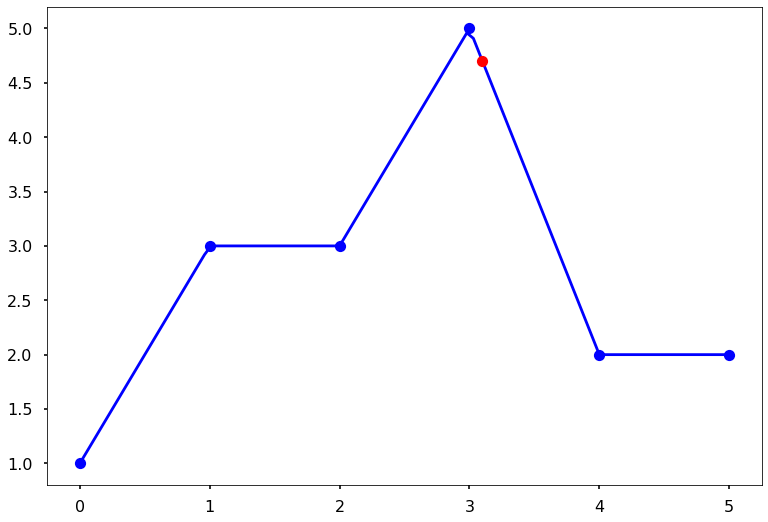

In [11]:
plt.plot(x,y,'ob')
plt.plot(x_lin,y_lin,'b')
plt.plot(3.1,f(3.1),'ro')

plt.show()

Newton Interpolation

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def deivided_diff(x,y):
  '''
  function to calculate the divided differences table
  '''
  n = len(y)
  coef = np.zeros([n,n])
  # the first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j] / (x[i+j]-x[i]))

  return coef

def newton_poly(coef, x_data, x):
  '''
  evaluate the newton polynomial
  at x
  '''

  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x - x_data[n-k])*p

<ipython-input-13-f716fea1c8ab>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')
